In [1]:
#EDA
#Profile of data
#statistical
#graphical

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files


uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS (3).csv


In [3]:
df = pd.read_csv("BIKE DETAILS.csv")

EDA - 1 About - Dataset:df = BIKE DETAILS.csv

In [4]:
#Q1.What is the range of selling prices in the dataset?
selling_price_column = 'selling_price'
price_range = df[selling_price_column].max() - df[selling_price_column].min()

print("The range of the selling price is:", price_range)

The range of the selling price is: 755000


In [5]:
#Q2.What is the median selling price for bikes in the dataset?

import pandas as pd

data = {'selling_price': [100, 120, 150, 180, 200]}
df = pd.read_csv("BIKE DETAILS.csv")

median_price = df['selling_price'].median()

print("Median selling price:", median_price)

Median selling price: 45000.0


In [6]:
#Q3.What is the most common seller type?
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

most_common_seller_type = df['seller_type'].value_counts().idxmax()

print("most common seller_type:", most_common_seller_type)

most common seller_type: Individual


In [7]:
#Q4.How many bikes have driven more than 50,000 kilometers?
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

bikes_driven_above_50k = df[df['km_driven'] > 50000]

print("bikes_driven_above_50k :",bikes_driven_above_50k )

bikes_driven_above_50k :                                name  selling_price  year seller_type  \
5                  Honda CB Twister          18000  2010  Individual   
15    Suzuki Access 125 [2007-2016]          25000  2012  Individual   
20             Hero Passion Pro 110          15000  2008  Individual   
31          Yamaha FZ S [2012-2016]          38000  2013  Individual   
43                Hero Passion XPro          28000  2012  Individual   
...                             ...            ...   ...         ...   
1049            Hero Super Splendor          20000  2007  Individual   
1050               Bajaj Pulsar 150          20000  2010  Individual   
1056                      Activa 3g          17000  2010  Individual   
1059                 Honda CB Shine          12000  2009  Individual   
1060               Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
5     1st owner      60000            53857.0  
15    1st owne

In [8]:
#Q5.What is the average km_driven value for each ownership type?
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

average_km_driven = df.groupby('owner')['km_driven'].mean()

print("average_km_driven :",average_km_driven)

average_km_driven : owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [9]:
#Q6.What proportion of bikes are from the year 2015 or older?
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

bikes_from_2015_or_older = df[df['year'] >= 2015]

proportion_of_bikes = len(bikes_from_2015_or_older) / len(df)

print("proportion_of_bikes :",proportion_of_bikes)

proportion_of_bikes : 0.527803958529689


In [10]:
#Q7.What is the trend of missing values across the dataset?
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

missing_values_trend = df.isnull().sum()

print("missing_values_trend :",missing_values_trend)

missing_values_trend : name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [11]:
#Q8.What is the highest ex_showroom_price recorded, and for which bike?
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

highest_ex_showroom_price = df['ex_showroom_price'].max()

bike_with_highest_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]

print("highest_ex_showroom_price :",highest_ex_showroom_price)
print("bike_with_highest_price :",bike_with_highest_price)

highest_ex_showroom_price : 1278000.0
bike_with_highest_price :                            name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


In [12]:
#Q9.What is the total number of bikes listed by each seller type?
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

total_bikes_by_seller_type = df['seller_type'].value_counts()

print("total_bikes_by_seller_type :",total_bikes_by_seller_type)

total_bikes_by_seller_type : seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


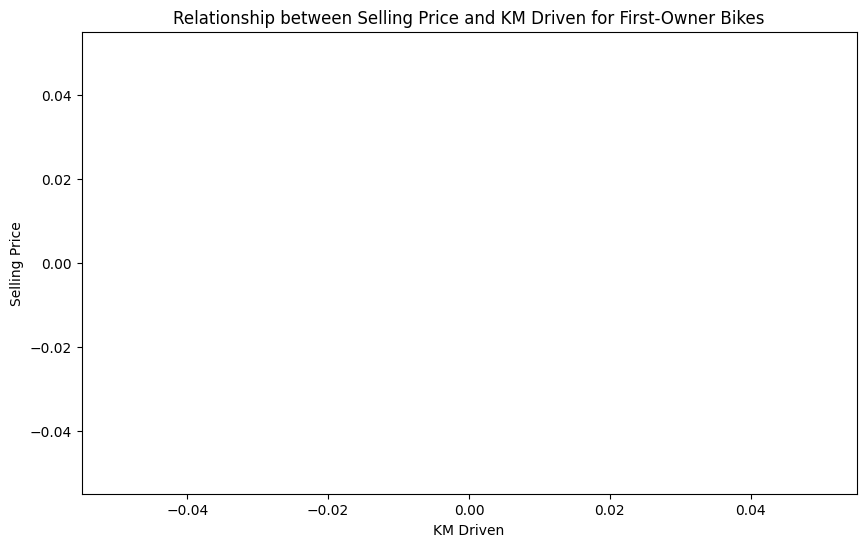

Correlation between selling_price and km_driven for first-owner bikes: nan


In [13]:
#Q10.What is the relationship between selling_price and km_driven for first-owner bikes?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")

first_owner_bikes = df[df['owner'] == 'First Owner']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Relationship between Selling Price and KM Driven for First-Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print("Correlation between selling_price and km_driven for first-owner bikes:", correlation)

In [14]:
#Q11.Identify and remove outliers in the km_driven column using the IQR method?
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")




Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1





lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]





df = df.drop(outliers.index)

print("outliers :",outliers)

outliers :                                  name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  Individual   
548                        

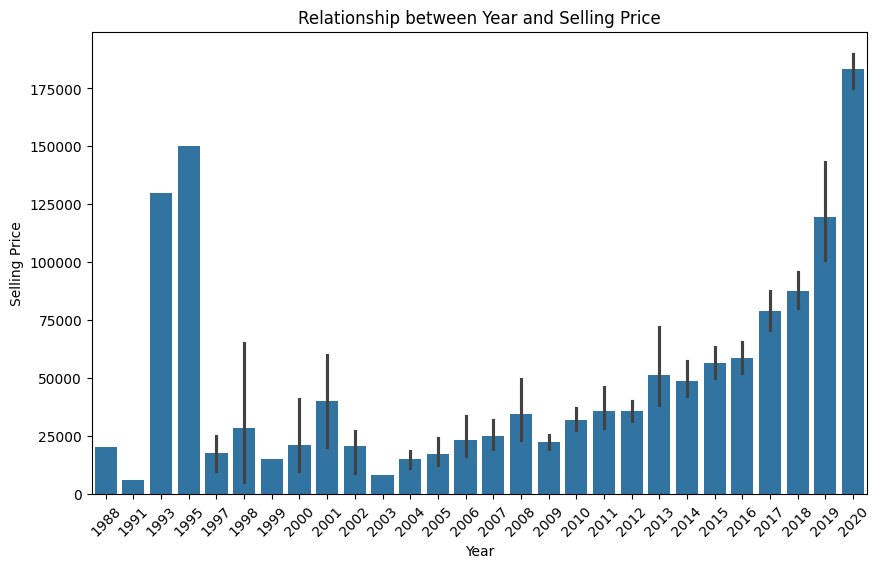

Correlation between year and selling_price: 0.40218840061474403


In [15]:
#Q12.Perform a bivariate analysis to visualize the relationship between year and selling_price?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

year_vs_selling_price = df['year'].corr(df['selling_price'])
print("Correlation between year and selling_price:", year_vs_selling_price)

In [16]:
#Q13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

current_year = 2023

df['bike_age'] = current_year - df['year']

average_depreciation = df['selling_price'].mean() - df['ex_showroom_price'].mean()

print("average_depreciation :",average_depreciation)

average_depreciation : -28320.56231386991


In [17]:
#Q14.Which bike names are priced significantly above the average price for their manufacturing year?
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

average_price_by_year = df.groupby('year')['selling_price'].mean()

df['average_price_year'] = df['year'].map(average_price_by_year)

significant_priced_bikes = df[df['selling_price'] > df['average_price_year']]

print("significant_priced_bikes :",significant_priced_bikes)

significant_priced_bikes :                                       name  selling_price  year seller_type  \
0                Royal Enfield Classic 350         175000  2019  Individual   
2      Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3        Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
7     Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
13                           Yamaha YZF R3         365000  2019  Individual   
...                                    ...            ...   ...         ...   
1004                  Bajaj Pulsar  NS 200          60000  2016  Individual   
1005                    TVS Apache RTR 160          60000  2014  Individual   
1008                    Bajaj Pulsar 220 F          52000  2012  Individual   
1012                   Bajaj Pulsar NS 200          50000  2014  Individual   
1023                Bajaj Avenger 220 dtsi          45000  2012  Individual   

          owner  km_driv

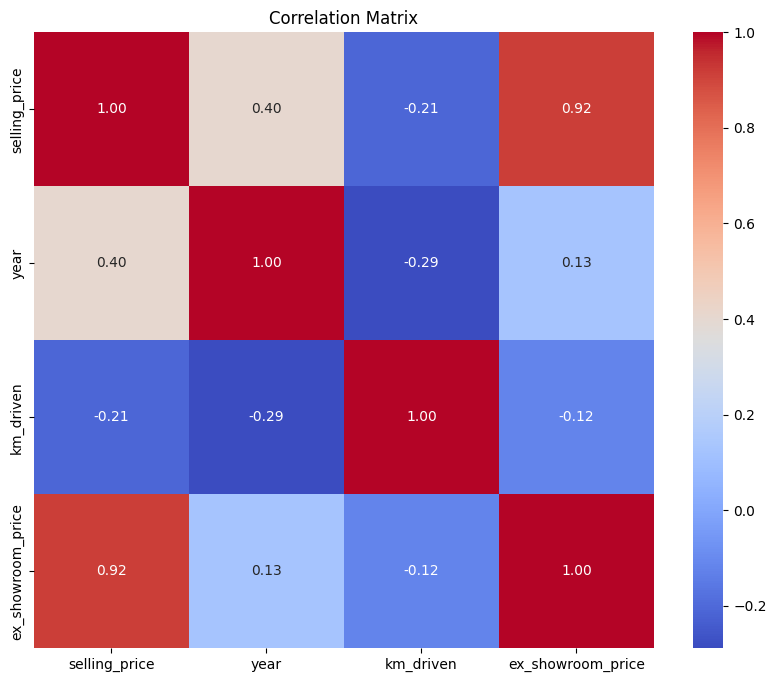

correlation_matrix :                    selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


In [18]:
#Q15.Develop a correlation matrix for numeric columns and visualize it using a heatmap?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")

numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print("correlation_matrix :",correlation_matrix)

EDA - 2 About - Dataset: Car Sale.csv

In [19]:
from google.colab import files


uploaded = files.upload()

Saving Car Sale.csv to Car Sale (3).csv


In [20]:
df = pd.read_csv("Car Sale.csv")

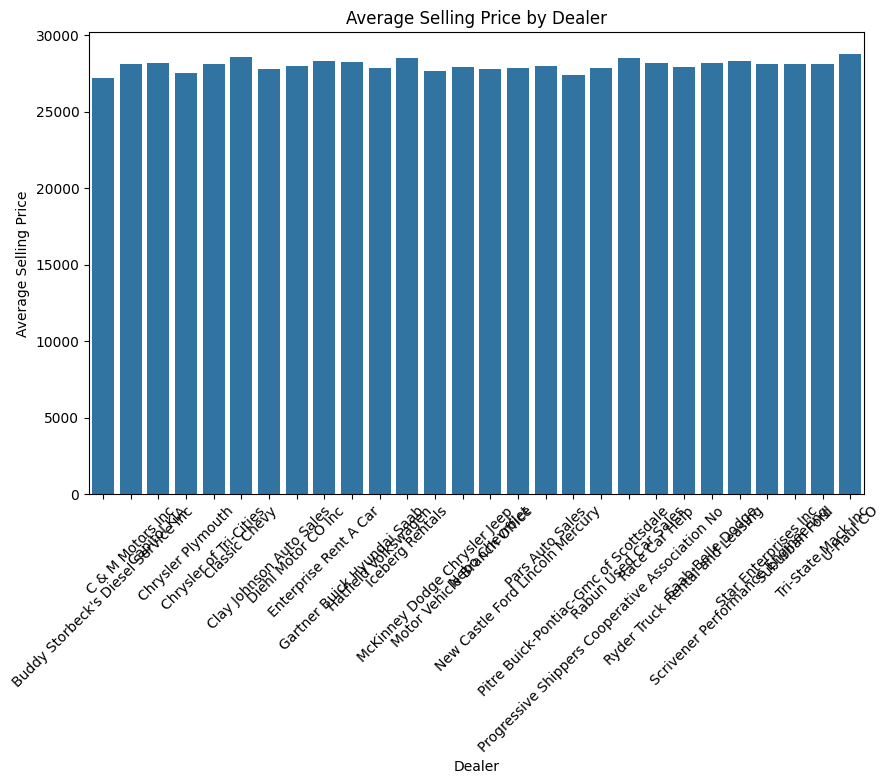

average_price_by_dealer : Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
Ne

In [21]:
#Q1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

average_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_dealer.index, y=average_price_by_dealer.values)
plt.title('Average Selling Price by Dealer')
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

print("average_price_by_dealer :",average_price_by_dealer)

The brand with the highest price variation is Lincoln with a standard deviation of 19658.05.

Top 5 brands with highest price variation:
Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64


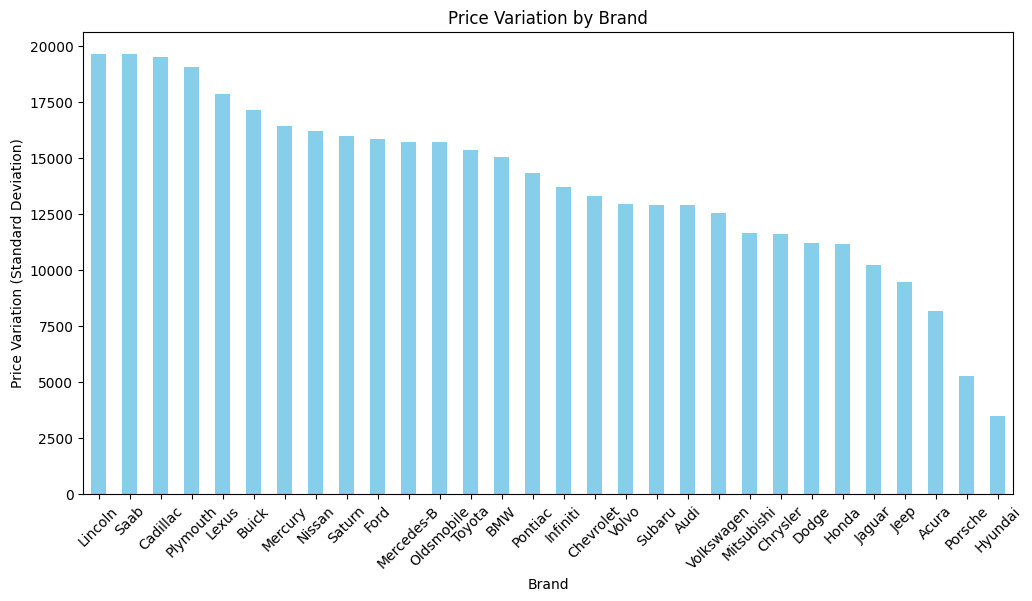


Top 5 brands by coefficient of variation:
Company
Plymouth      0.648393
Lincoln       0.625912
BMW           0.600447
Nissan        0.599473
Mercedes-B    0.583518
Name: Price ($), dtype: float64


In [22]:
#Q2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
import pandas as pd

df = pd.read_csv("Car Sale.csv")

price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

highest_variation_Company = price_variation.idxmax()
highest_variation_value = price_variation.max()

print(f"The brand with the highest price variation is {highest_variation_Company} with a standard deviation of {highest_variation_value:.2f}.")

print("\nTop 5 brands with highest price variation:")
print(price_variation.head(5))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
price_variation.plot(kind='bar', color='skyblue')
plt.title('Price Variation by Brand')
plt.xlabel('Brand')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=45)
plt.show()

# Coefficient of variation
price_cv = (df.groupby('Company')['Price ($)'].std() / df.groupby('Company')['Price ($)'].mean()).sort_values(ascending=False)
print("\nTop 5 brands by coefficient of variation:")
print(price_cv.head(5))

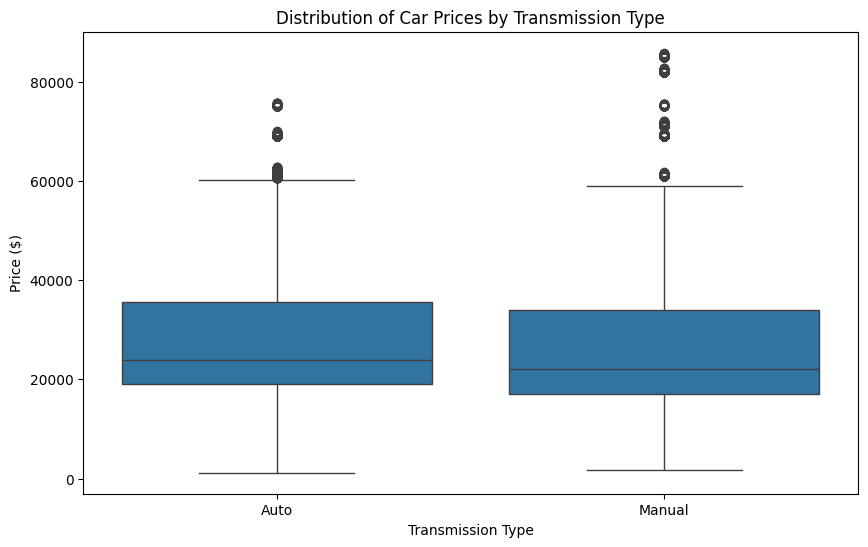

Q1 : Transmission
Auto      19000.0
Manual    17000.0
Name: Price ($), dtype: float64
Q3 : Transmission
Auto      35500.0
Manual    34000.0
Name: Price ($), dtype: float64
IQR : Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [23]:
#Q3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt
plt.show()


Q1 = df.groupby('Transmission')['Price ($)'].quantile(0.25)
Q3 = df.groupby('Transmission')['Price ($)'].quantile(0.75)

IQR = Q3 - Q1

print("Q1 :",Q1)
print("Q3 :",Q3)
print("IQR :",IQR)

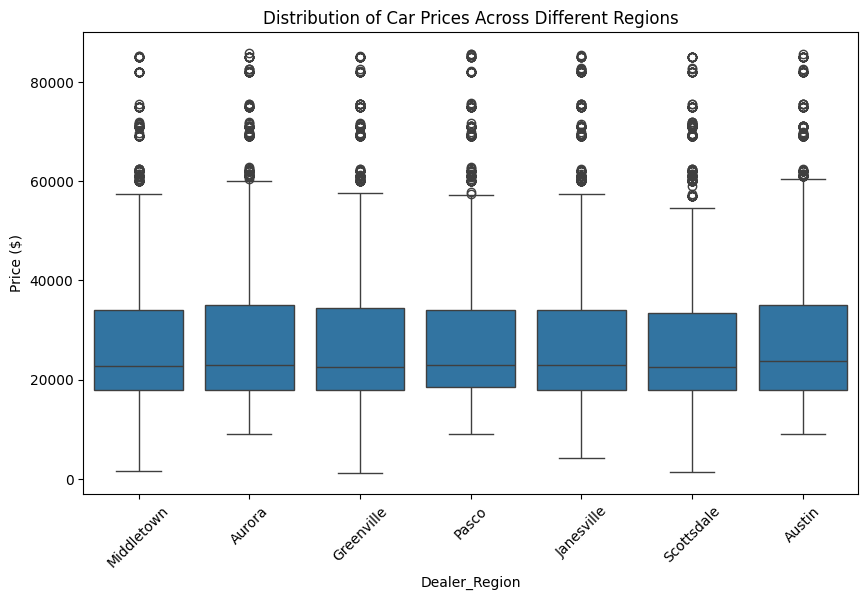

df :              Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedi

In [24]:
#Q4.What is the distribution of car prices across different regions?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

print("df :",df)

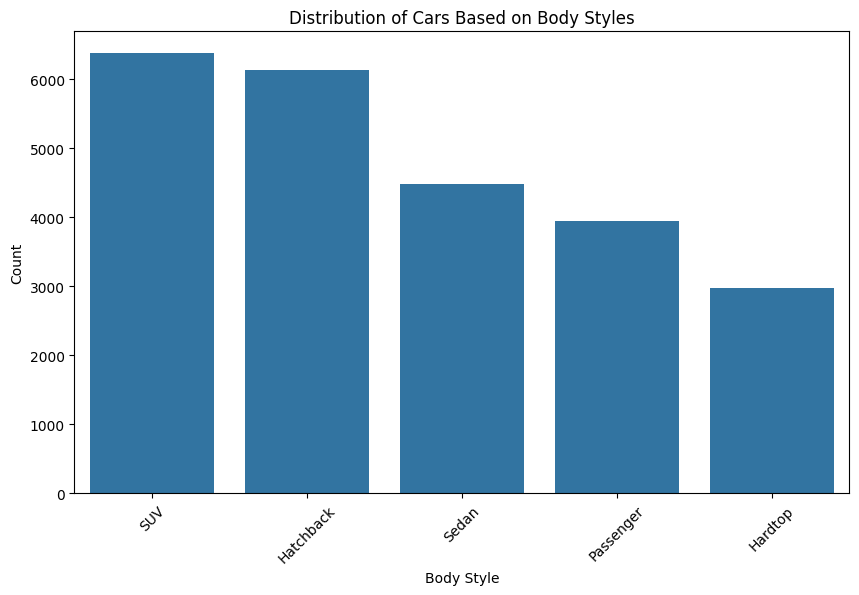

body_style_counts : Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [25]:
#Q5.What is the distribution of cars based on body styles?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

body_style_counts = df['Body Style'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values)
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("body_style_counts :",body_style_counts)

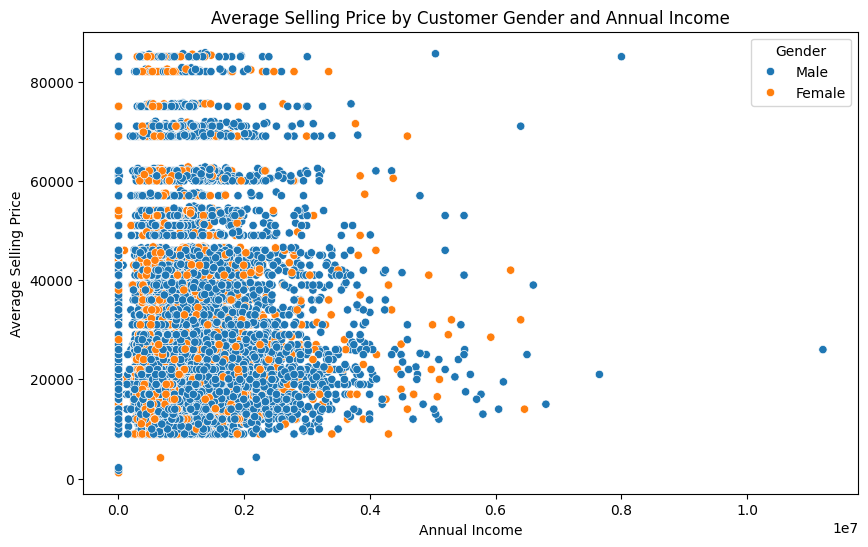

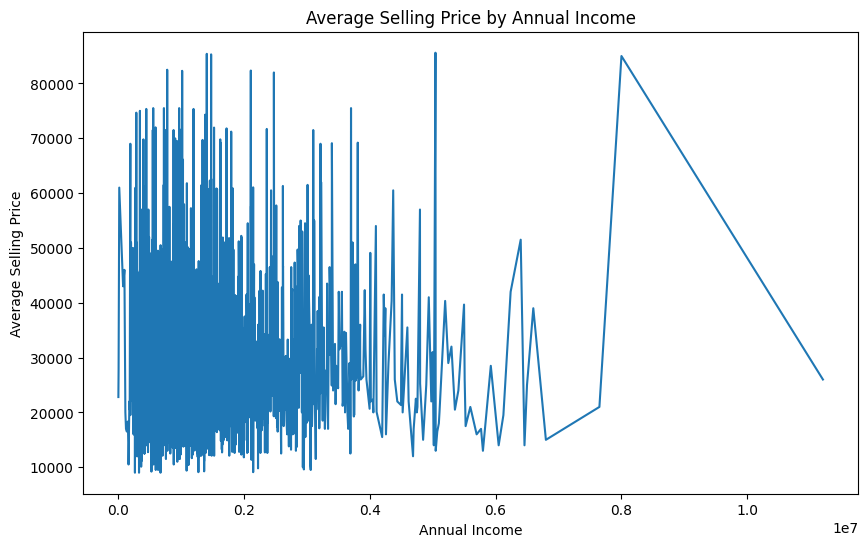

average_price_by_income : Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


In [26]:
#Q6.How does the average selling price of cars vary by customer gender and annual income?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=df)
plt.title('Average Selling Price by Customer Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')
plt.show()

average_price_by_income = df.groupby('Annual Income')['Price ($)'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_income.index, y=average_price_by_income.values)
plt.title('Average Selling Price by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')
plt.show()

print("average_price_by_income :",average_price_by_income)

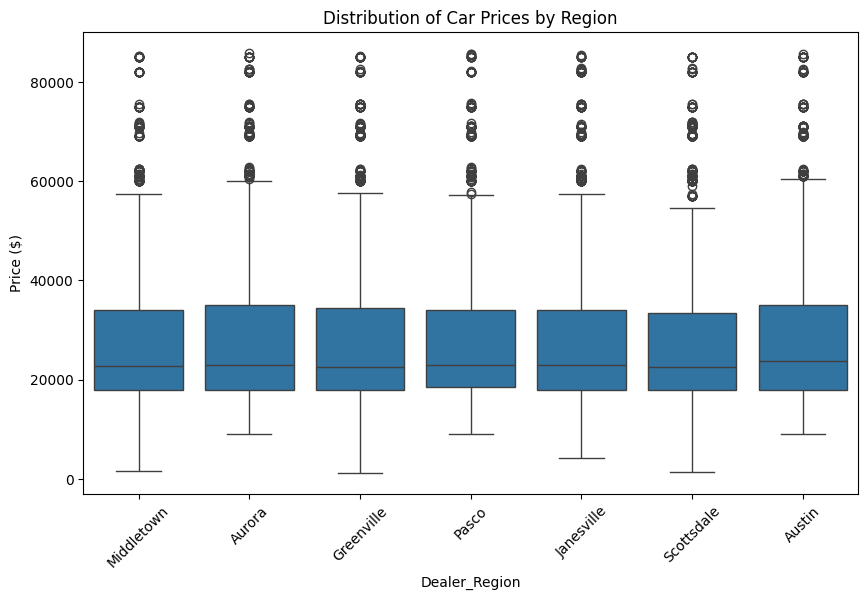

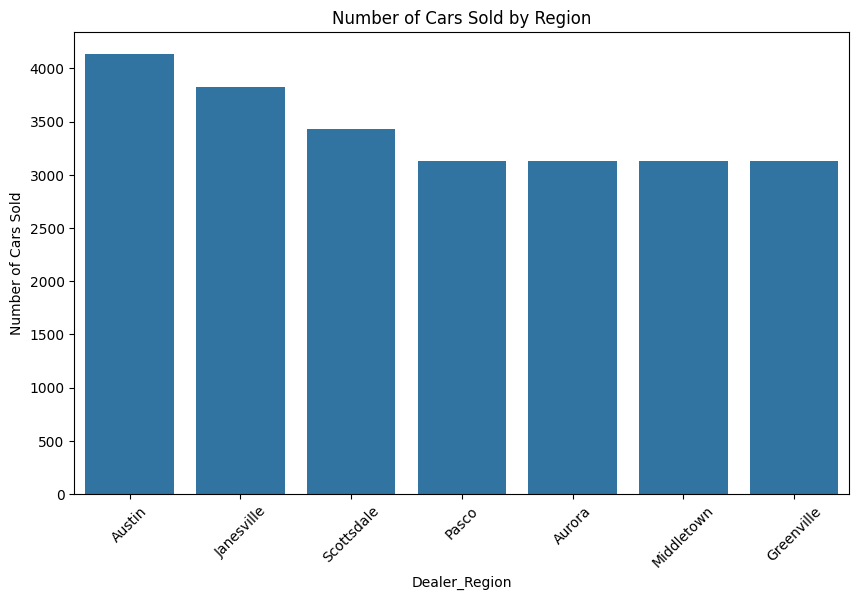

cars_sold_by_region : Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


In [27]:
#Q7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

cars_sold_by_region = df['Dealer_Region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer_Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

print("cars_sold_by_region :",cars_sold_by_region)

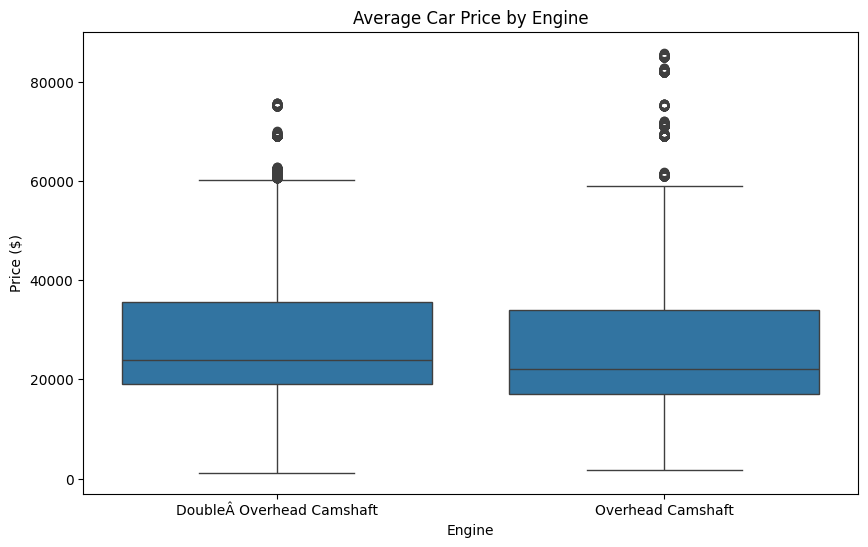

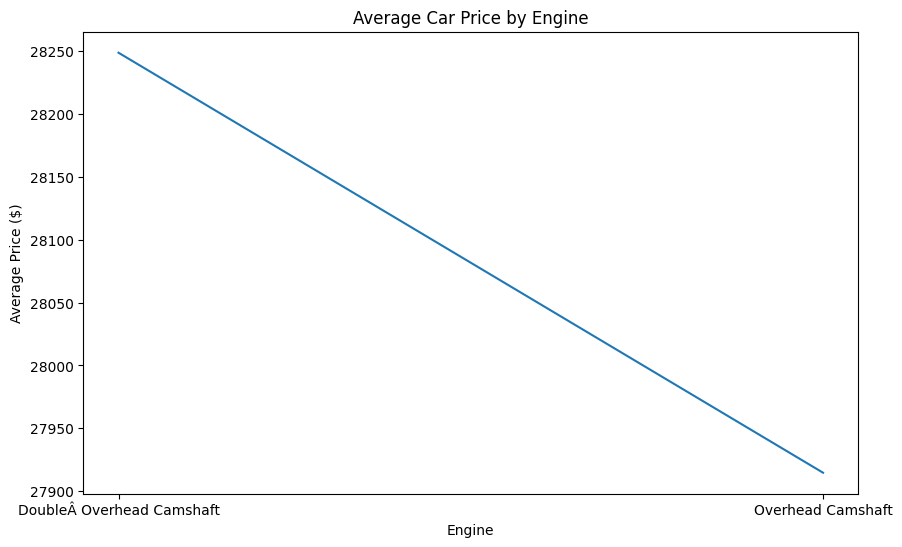

average_price_by_engine_size : Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [28]:
#Q8.How does the average car price differ between cars with different engine sizes?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Engine', y='Price ($)', data=df)
plt.title('Average Car Price by Engine')
plt.xlabel('Engine')
plt.ylabel('Price ($)')
plt.show()

average_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_engine_size.index, y=average_price_by_engine_size.values)
plt.title('Average Car Price by Engine')
plt.xlabel('Engine')
plt.ylabel('Average Price ($)')
plt.show()

print("average_price_by_engine_size :",average_price_by_engine_size)

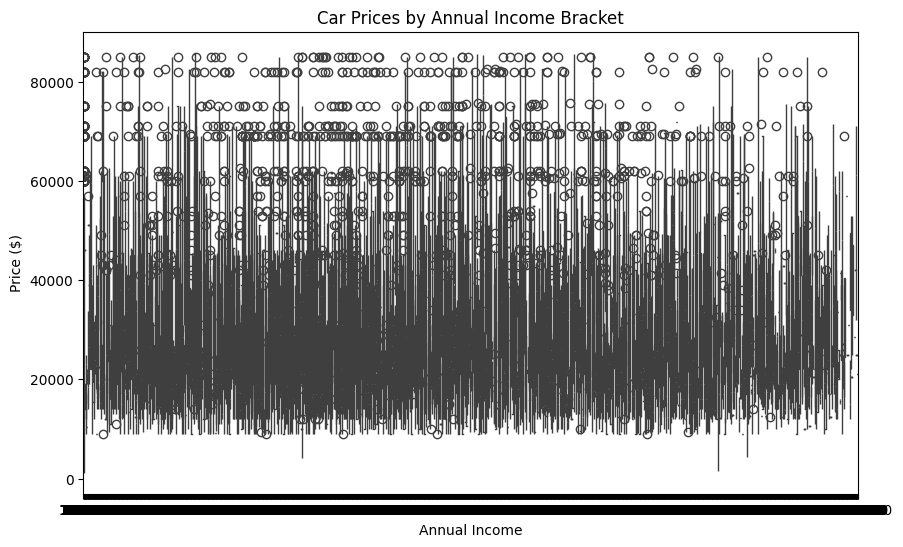

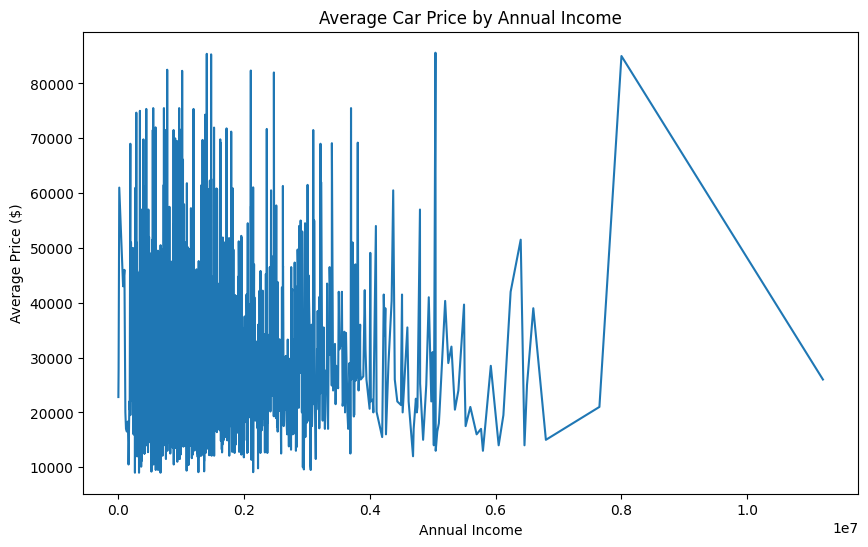

average_price_by_income : Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


In [29]:
#Q9.How do car prices vary based on the customer’s annual income bracket?
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Annual Income', y='Price ($)', data=df)
plt.title('Car Prices by Annual Income Bracket')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.show()

average_price_by_income = df.groupby('Annual Income')['Price ($)'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_income.index, y=average_price_by_income.values)
plt.title('Average Car Price by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Price ($)')
plt.show()

print("average_price_by_income :",average_price_by_income)

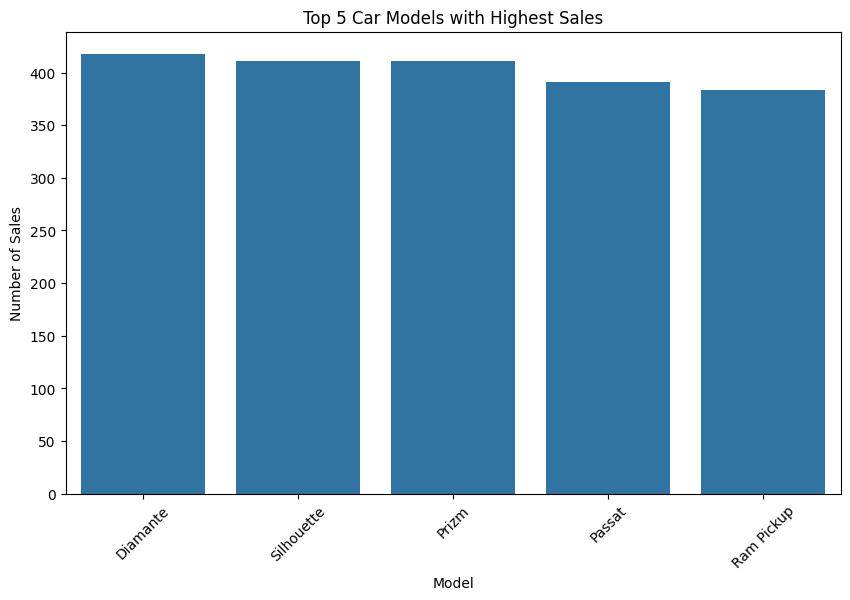

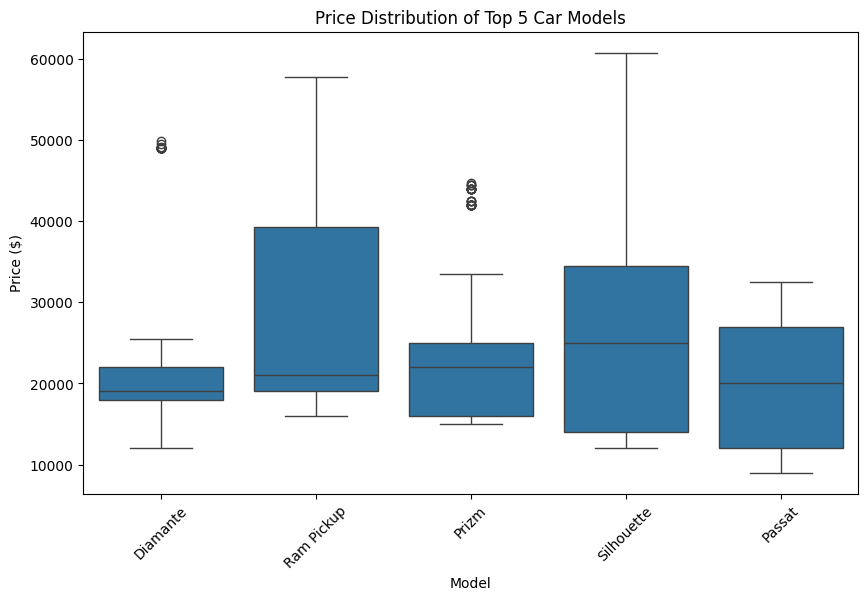

top_5_models : Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64
top_5_models_prices :              Car_id        Date Customer Name  Gender  Annual Income  \
5      C_CND_000006    1/2/2022     Guadalupe    Male         850000   
69     C_CND_000070    1/4/2022          Toby    Male          13500   
91     C_CND_000092    1/5/2022      Mauricio    Male          13500   
107    C_CND_000108    1/6/2022          Noel    Male        1362000   
116    C_CND_000117    1/9/2022          Jake    Male         700000   
...             ...         ...           ...     ...            ...   
23868  C_CND_023869  12/30/2023        Youenn  Female          13500   
23882  C_CND_023883  12/31/2023      Victoria    Male         501000   
23884  C_CND_023885  12/31/2023        Winnie    Male         820500   
23890  C_CND_023891  12/31/2023       Joaquin    Male        2450000   
23902  C_CND_023903  12/31/2023         Jimmy  Fe

In [30]:
#Q10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

model_sales_count = df['Model'].value_counts()

top_5_models = model_sales_count.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_models.index, y=top_5_models.values)
plt.title('Top 5 Car Models with Highest Sales')
plt.xlabel('Model')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

top_5_models_prices = df[df['Model'].isin(top_5_models.index)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_models_prices)
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

print("top_5_models :",top_5_models)
print("top_5_models_prices :",top_5_models_prices)

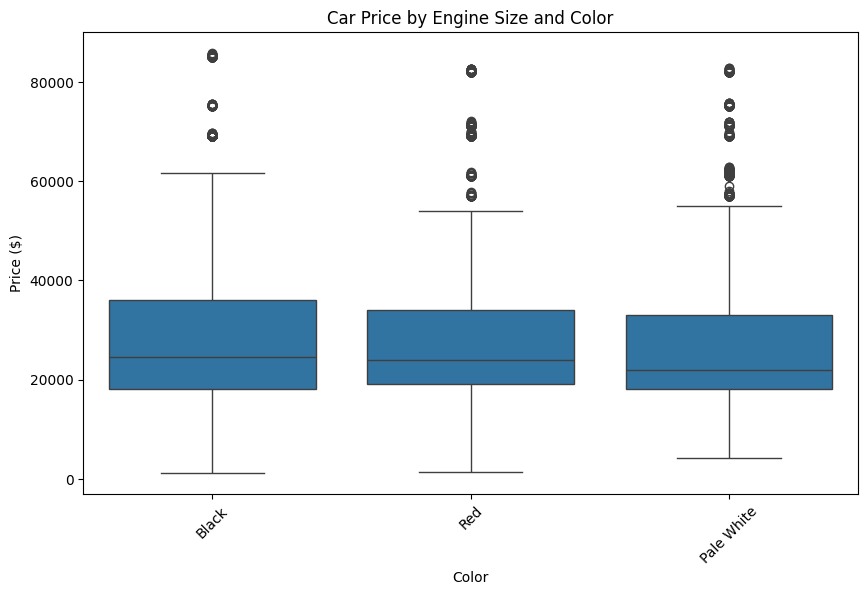

The color with the highest price variation is Red with a standard deviation of 15519.36.

Top 5 colors with highest price variation:
Color
Black         15286.065976
Pale White    14077.346859
Red           15519.360962
Name: Price ($), dtype: float64


In [31]:
#Q11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Color', y='Price ($)', data=df)
plt.title('Car Price by Engine Size and Color')
plt.xlabel('Color')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

price_variation_by_color = df.groupby('Color')['Price ($)'].std()

highest_variation_color = price_variation_by_color.idxmax()

highest_variation_value = price_variation_by_color.max()

print(f"The color with the highest price variation is {highest_variation_color} with a standard deviation of {highest_variation_value:.2f}.")

print("\nTop 5 colors with highest price variation:")

print(price_variation_by_color.head(5))

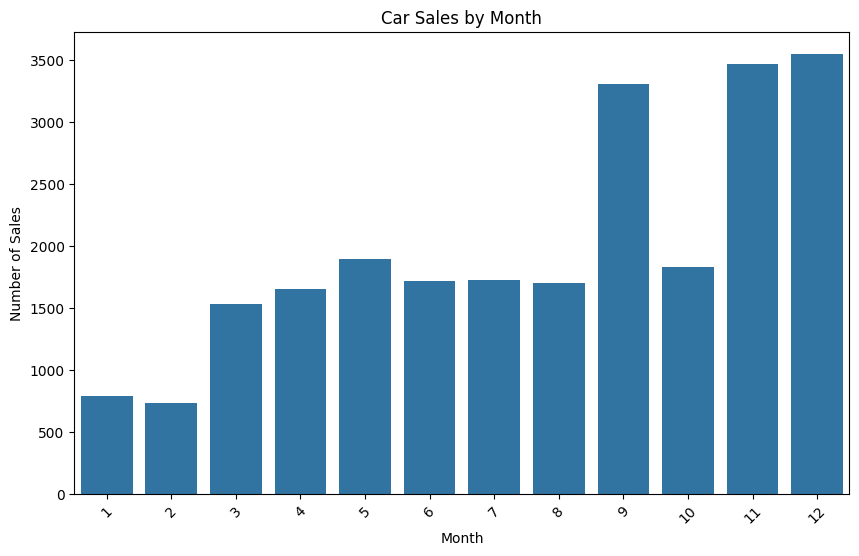

sales_by_month : Month
12    3546
11    3470
9     3305
5     1895
10    1830
7     1725
6     1715
8     1705
4     1655
3     1535
1      790
2      735
Name: count, dtype: int64


In [32]:
#Q12.Is there any seasonal trend in car sales based on the date of sale?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

sales_by_month = df['Month'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

print("sales_by_month :", sales_by_month)

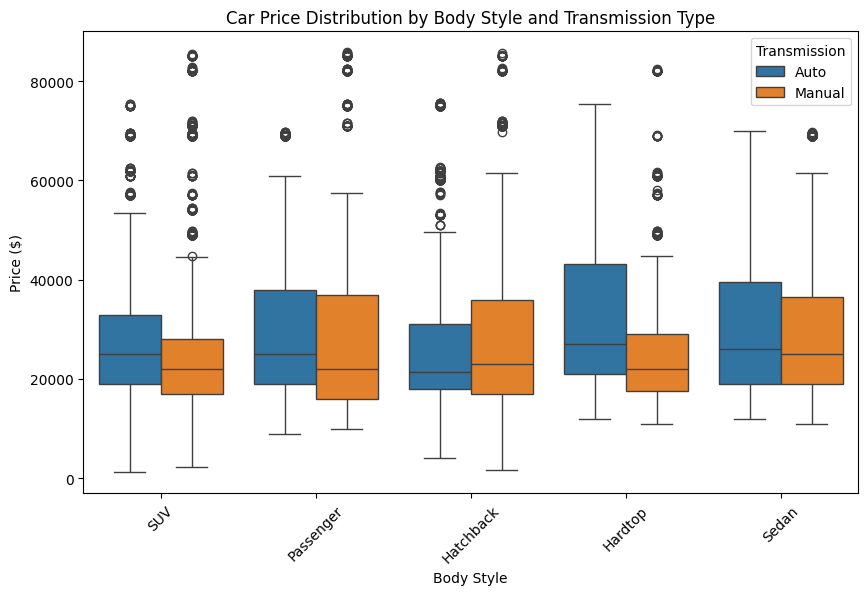

df :              Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedi

In [33]:
#Q13.How does the car price distribution change when considering different combinations of body style and transmission type?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

print("df :",df)

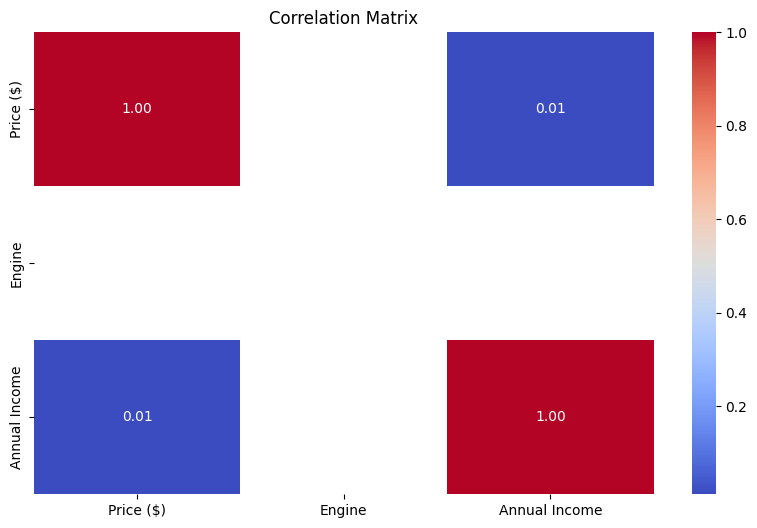

correlation_matrix :                Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


In [34]:
#Q14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

correlation_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print("correlation_matrix :", correlation_matrix)

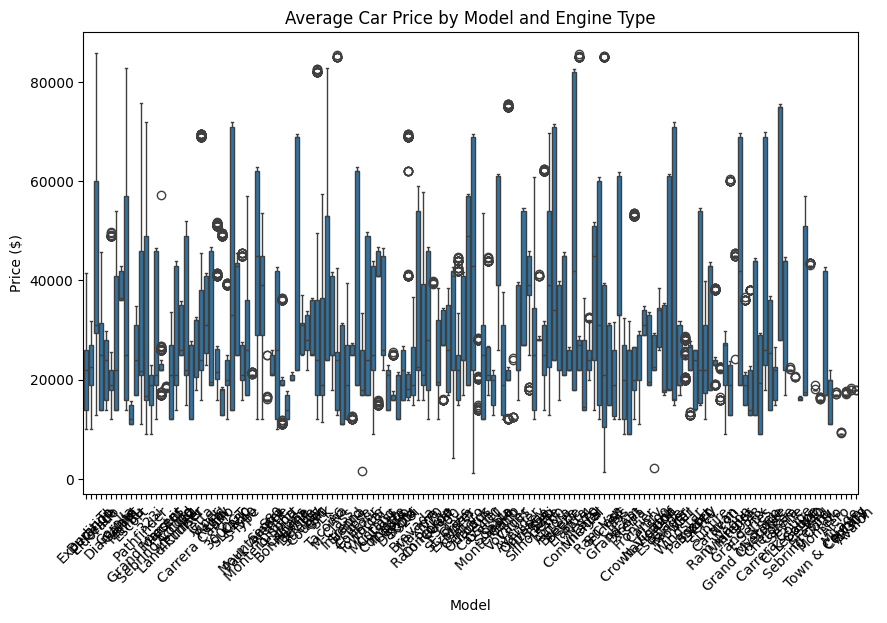

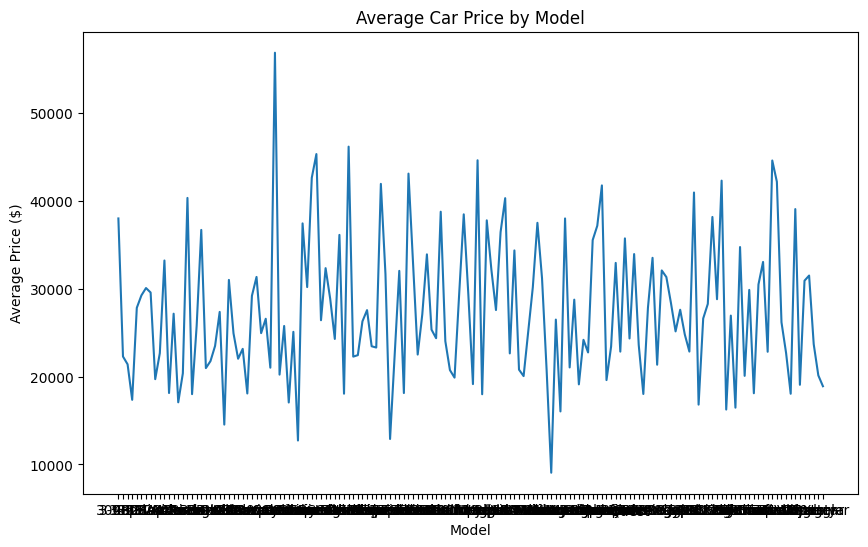

average_price_by_model : Model
3-Sep       37986.380117
3000GT      22282.250825
300M        21394.888889
323i        17355.634615
328i        27821.359223
                ...     
Viper       30905.258333
Voyager     31491.110497
Windstar    23682.842975
Wrangler    20134.548780
Xterra      18901.076087
Name: Price ($), Length: 154, dtype: float64


In [35]:
#Q15.How does the average car price vary across different car models and engine types?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=df)
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

average_price_by_model = df.groupby('Model')['Price ($)'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_model.index, y=average_price_by_model.values)
plt.title('Average Car Price by Model')
plt.xlabel('Model')
plt.ylabel('Average Price ($)')
plt.show()

print("average_price_by_model :", average_price_by_model)

EDA - 3 : amazon.csv

In [36]:
from google.colab import files


uploaded = files.upload()

Saving amazon.csv to amazon (2).csv


In [37]:
df = pd.read_csv("amazon.csv")

In [38]:
#Q1.What is the average rating for each product category?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

average_ratings = df.groupby("category")["rating"].mean()

print(average_ratings)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [39]:
#Q2.What are the top rating_count products by category?
import pandas as pd

df = pd.read_csv("amazon.csv")

df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

top_rating_count_products = df.groupby('category')['rating_count'].idxmax()

print("top_rating_count_products :",top_rating_count_products)


top_rating_count_products : category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Re

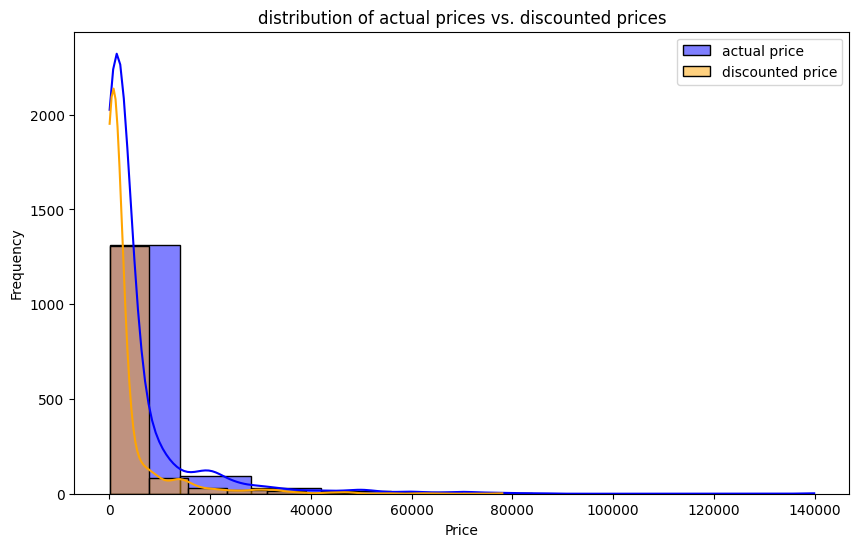

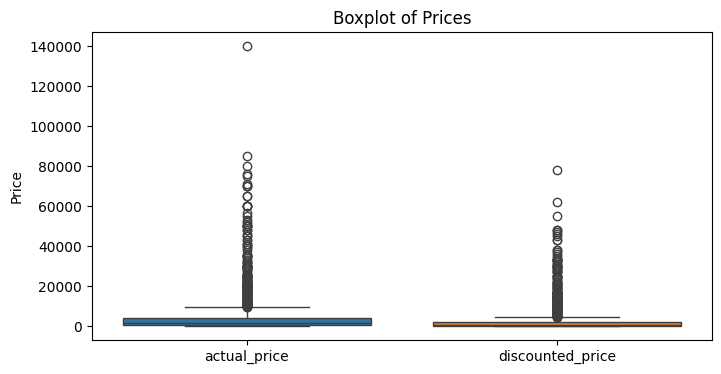

In [40]:
#Q3.What is the distribution of discounted prices vs. actual prices?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")

df["discounted_price"] = pd.to_numeric(df["discounted_price"].str.replace(",", "").str.replace("₹", ""), errors="coerce")
df["actual_price"] = pd.to_numeric(df["actual_price"].str.replace(",", "").str.replace("₹", ""), errors="coerce")


df["Price_Ratio"] = df["discounted_price"] / df["actual_price"]

plt.figure(figsize=(10, 6))
sns.histplot(df["actual_price"], color="blue", label="actual price", kde=True, bins=10)
sns.histplot(df["discounted_price"], color="orange", label="discounted price", kde=True, bins=10)
plt.title("distribution of actual prices vs. discounted prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[["actual_price", "discounted_price"]])
plt.title("Boxplot of Prices")
plt.ylabel("Price")
plt.show()

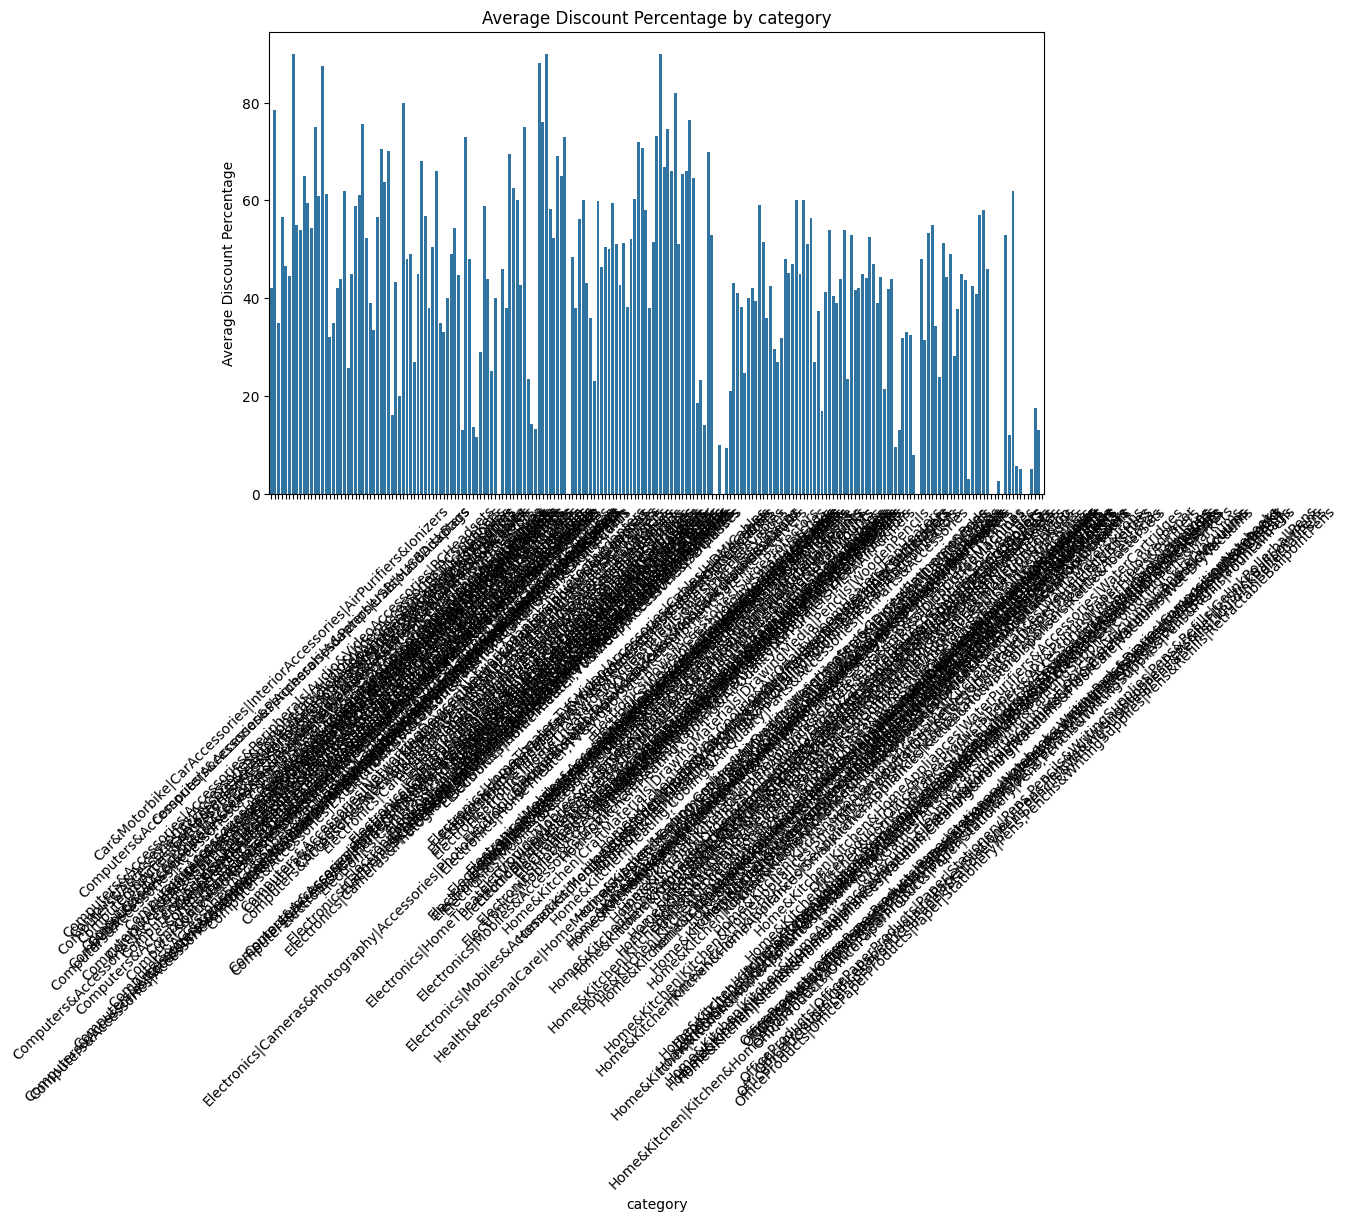

average_discount_percentage : category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Writing

In [41]:
#Q4.How does the average discount percentage vary across categories?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")

df["discount_percentage"] = pd.to_numeric(df["discount_percentage"].str.replace("%", ""), errors="coerce")

average_discount_percentage = df.groupby("category")["discount_percentage"].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_discount_percentage.index, y=average_discount_percentage.values)
plt.title("Average Discount Percentage by category")
plt.xlabel("category")
plt.ylabel("Average Discount Percentage")
plt.xticks(rotation=45)
plt.show()

print("average_discount_percentage :",average_discount_percentage)

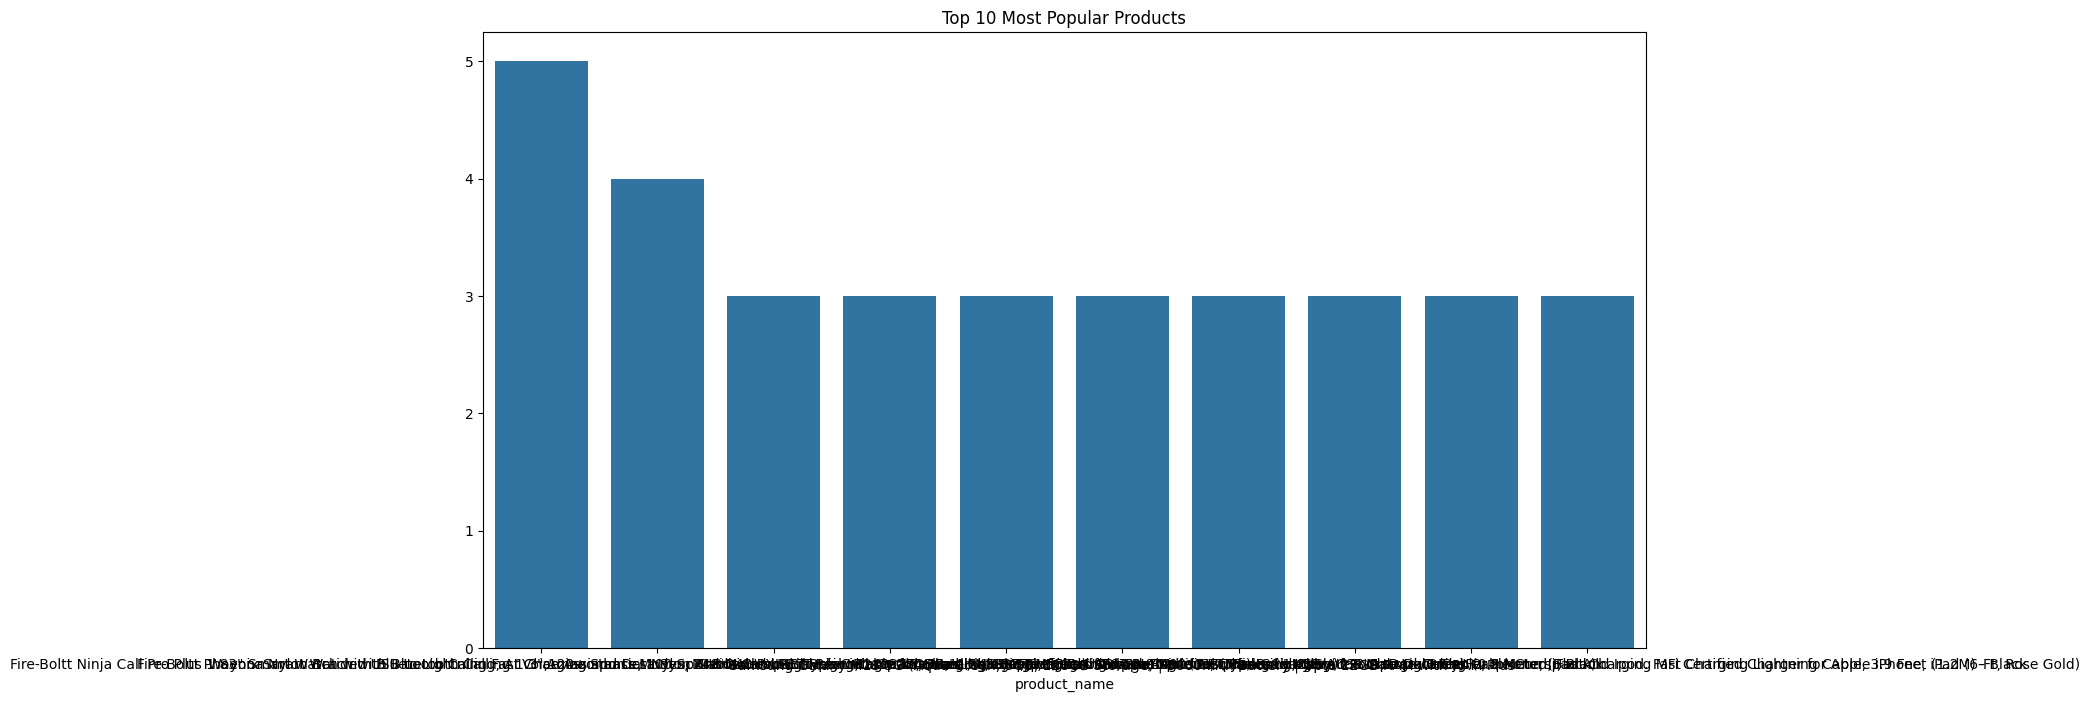

top_10_products : product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                           

In [42]:
#Q5.What are the most popular product names?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")

product_counts = df["product_name"].value_counts()

top_10_products = product_counts.head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.title("Top 10 Most Popular Products")
plt.show()

print("top_10_products :",top_10_products)

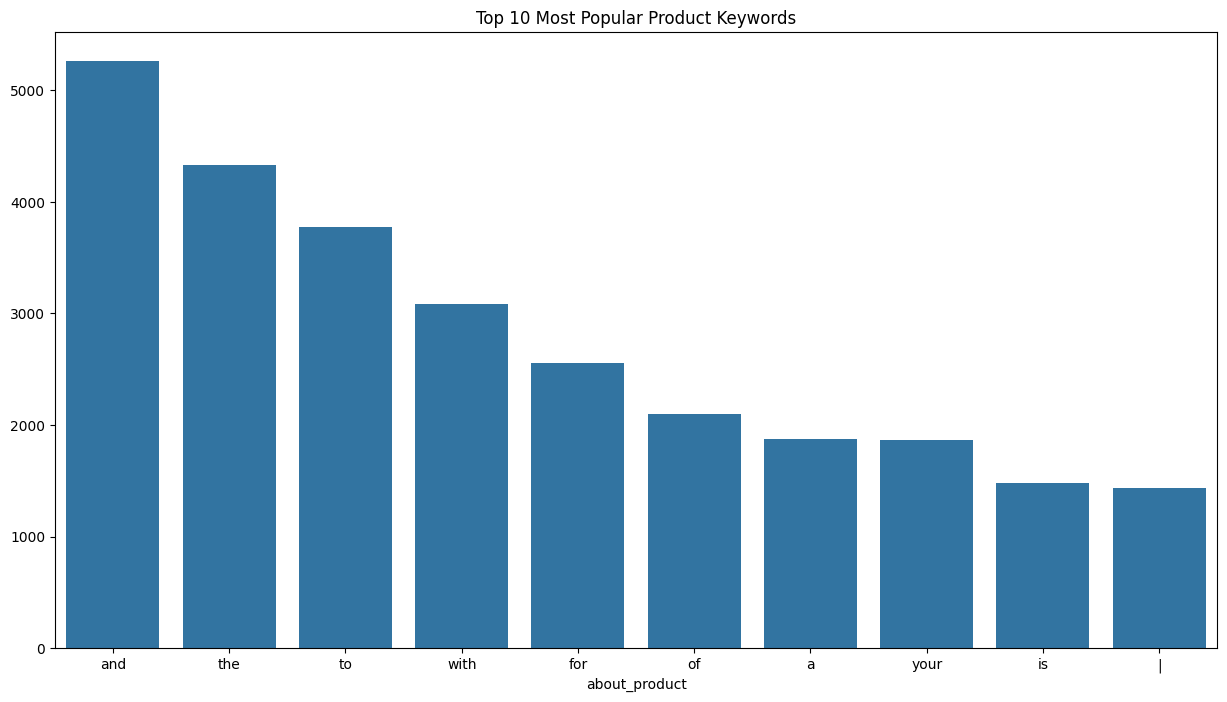

top_10_keywords : about_product
and     5260
the     4335
to      3777
with    3086
for     2554
of      2099
a       1876
your    1867
is      1480
|       1431
Name: count, dtype: int64


In [43]:
#Q6.What are the most popular product keywords?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")

df["about_product"] = df["about_product"].str.lower()

keyword_counts = df["about_product"].str.split().explode().value_counts()

top_10_keywords = keyword_counts.head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_10_keywords.index, y=top_10_keywords.values)
plt.title("Top 10 Most Popular Product Keywords")
plt.show()

print("top_10_keywords :", top_10_keywords)

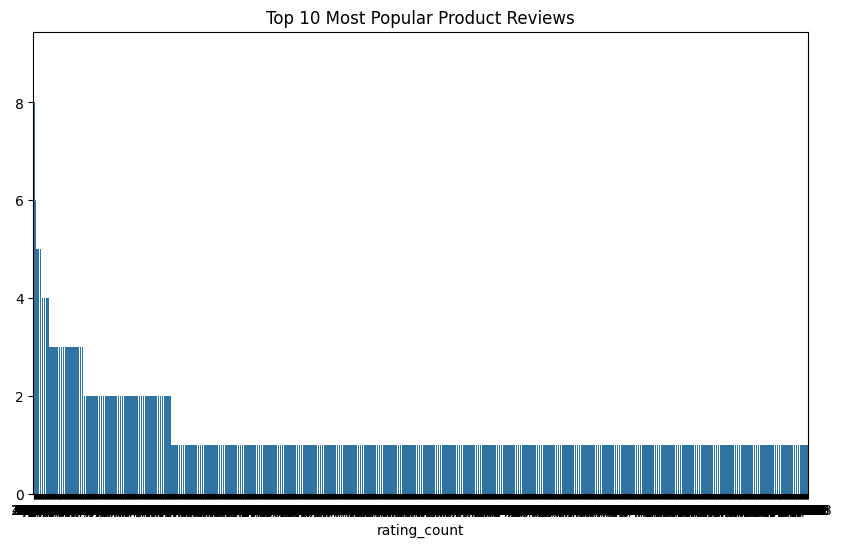

Top Rated Reviews:
      product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
324   B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   
174   B0BP7XLX48  Syncwire LTG to USB Cable for Fast Charging Co...   
775   B09ZHCJDP1  Amazon Basics Wireless Mouse | 2.4 GHz Connect...   
1201  B0BQ3K23Y1  Oratech Coffee Frother electric, milk frother ...   

                                               category discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...           ₹2,099   
324   Computers&Accessories|Accessories&Peripherals|...             ₹249   
174   Computers&Accessories|Accessories&Peripherals|...             ₹399   
775   Computers&Accessories|Accessories&Peripherals|...             ₹499   
1201  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             ₹279   

     actual_price discount_percentage rating rating_count  \
1279       ₹2,499                 16

In [44]:
#Q7.What are the most popular product reviews?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")

review_counts = df["rating_count"].value_counts()

highest_rated = df.sort_values(by='rating', ascending=False)

most_reviewed_products = df['product_id'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=review_counts.index, y=review_counts.values)
plt.title("Top 10 Most Popular Product Reviews")
plt.show()

print("Top Rated Reviews:")
print(highest_rated.head())

print("\nMost review_counts:")
print(review_counts.head())

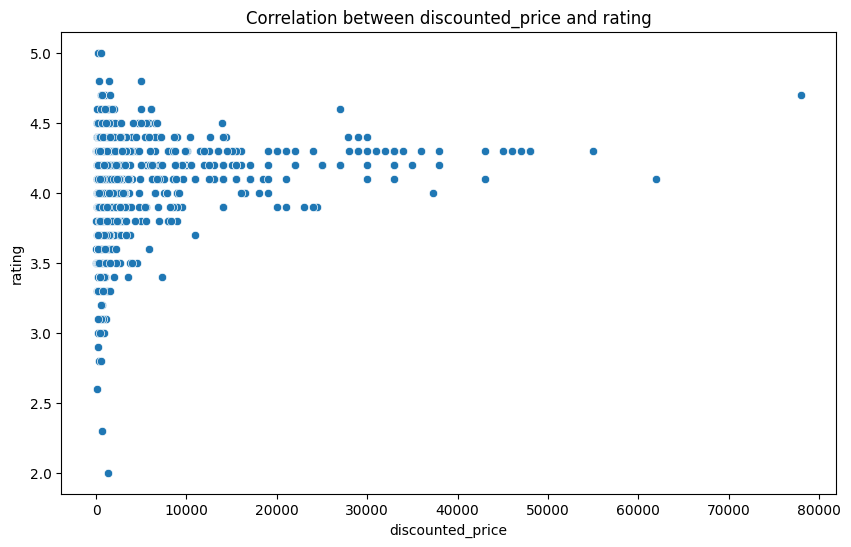

Correlation between discounted_price and rating: 0.12033741712288548


In [45]:
#Q8.What is the correlation between discounted_price and rating?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")

df["discounted_price"] = pd.to_numeric(df["discounted_price"].str.replace(",", "").str.replace("₹", ""), errors="coerce")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

correlation = df["discounted_price"].corr(df["rating"])

plt.figure(figsize=(10, 6))
sns.scatterplot(x="discounted_price", y="rating", data=df)
plt.title("Correlation between discounted_price and rating")
plt.show()

print("Correlation between discounted_price and rating:", correlation)

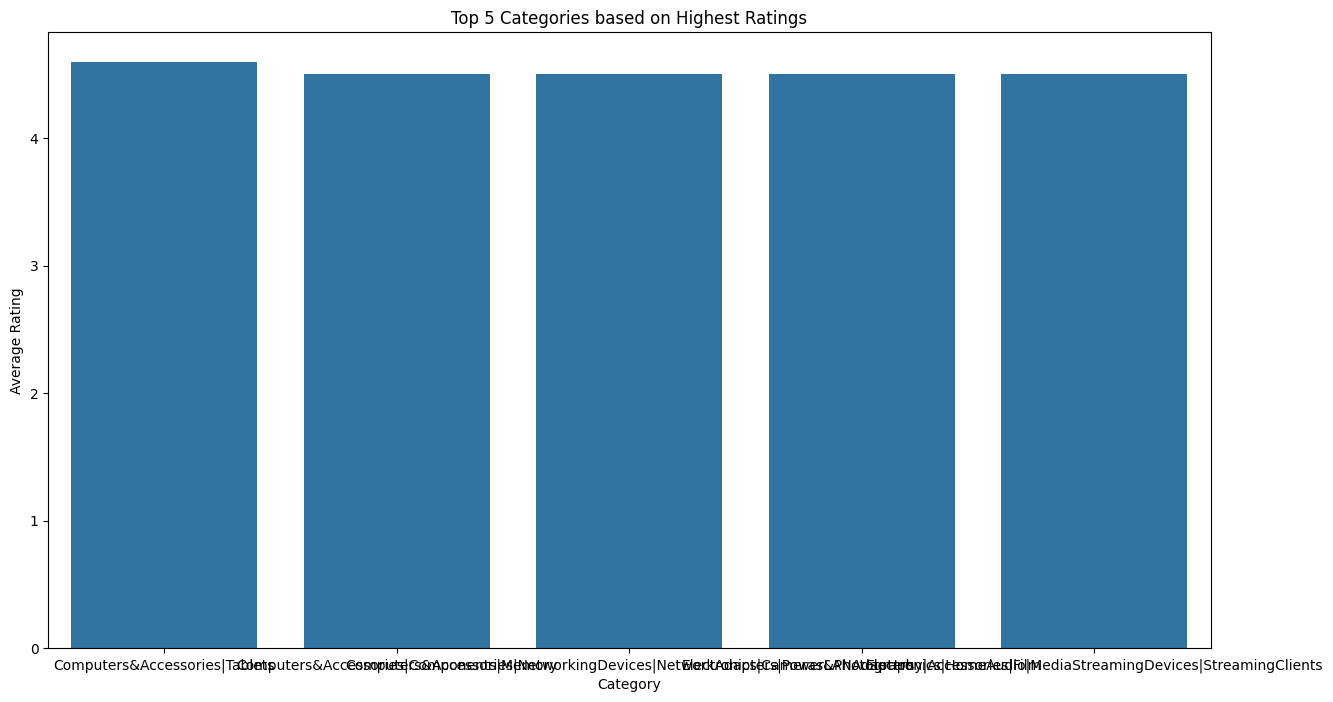

Top 5 Categories based on Highest Ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [46]:
#Q9.What are the Top 5 categories based on the highest ratings?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

category_ratings = df.groupby("category")["rating"].mean()

top_5_categories = category_ratings.nlargest(5)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)
plt.title("Top 5 Categories based on Highest Ratings")
plt.xlabel("Category")
plt
plt.ylabel("Average Rating")
plt.show()

print("Top 5 Categories based on Highest Ratings:")
print(top_5_categories)

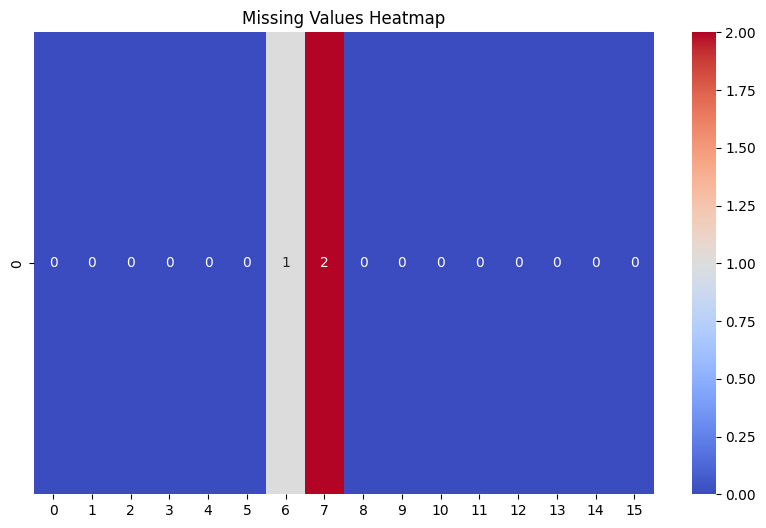

Missing Values per Column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


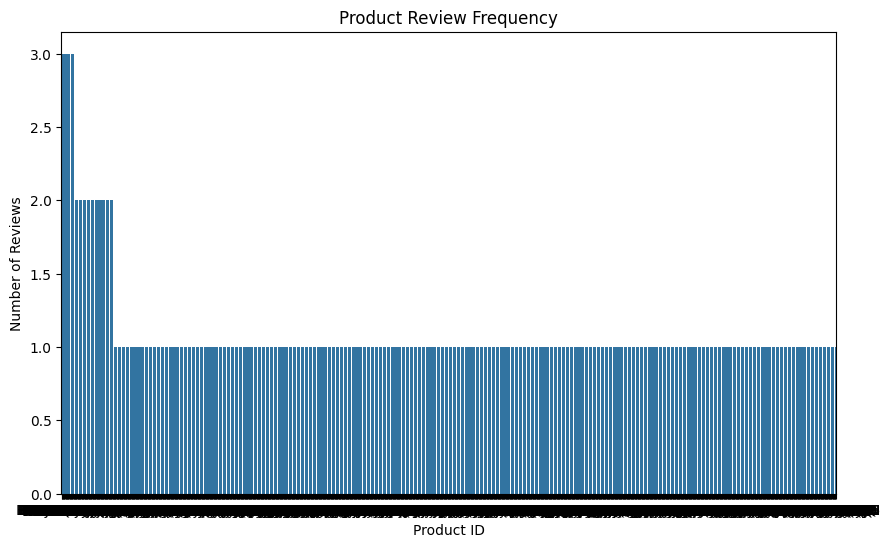

Top Reviewed Products:
product_id
B07JW9H4J1    3
B085DTN6R2    3
B07XLCFSSN    3
B077Z65HSD    3
B09W5XR9RT    3
Name: count, dtype: int64


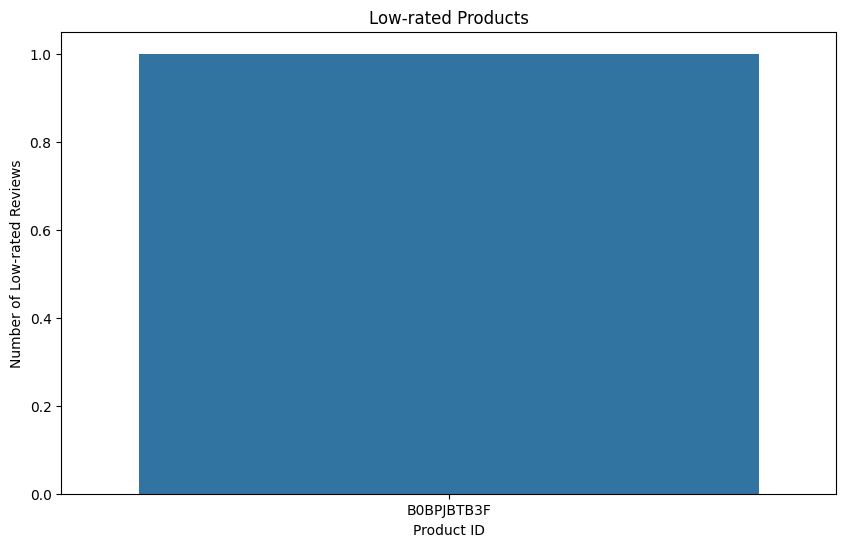

Number of low-rated products: 1


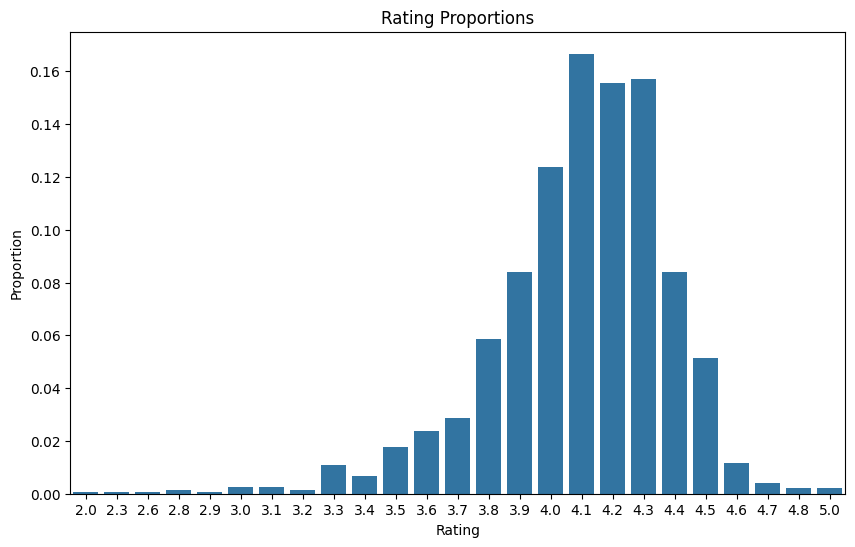

Rating Proportions:
rating
4.1    0.166667
4.3    0.157104
4.2    0.155738
4.0    0.123634
3.9    0.084016
4.4    0.084016
3.8    0.058743
4.5    0.051230
3.7    0.028689
3.6    0.023907
3.5    0.017760
4.6    0.011612
3.3    0.010929
3.4    0.006831
4.7    0.004098
3.0    0.002732
3.1    0.002732
5.0    0.002049
4.8    0.002049
3.2    0.001366
2.8    0.001366
2.3    0.000683
2.0    0.000683
2.6    0.000683
2.9    0.000683
Name: proportion, dtype: float64


In [47]:
#Q10.Identify any potential areas for improvement or optimization based on the data analysis?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# 1. Check for Missing Values
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.values.reshape(1, -1), annot=True, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()

print("Missing Values per Column:")
print(missing_values)

# 2. Analyze Product Review Frequency
product_review_counts = df['product_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=product_review_counts.index, y=product_review_counts.values)
plt.title("Product Review Frequency")
plt.xlabel("Product ID")
plt.ylabel("Number of Reviews")
plt.show()

print("Top Reviewed Products:")
print(product_review_counts.head())

# 3. Identify Areas for Improvement
# Example: Low-rated products
low_rated_products = df[df['rating'] <= 2]

plt.figure(figsize=(10, 6))
sns.barplot(x=low_rated_products['product_id'].value_counts().index, y=low_rated_products['product_id'].value_counts().values)
plt.title("Low-rated Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Low-rated Reviews")
plt.show()
print(f"Number of low-rated products: {len(low_rated_products)}")

# Example: Imbalanced data in reviews
rating_counts = df['rating'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title("Rating Proportions")
plt.xlabel("Rating")
plt.ylabel("Proportion")
plt.show()
print("Rating Proportions:")
print(rating_counts)

# Optimization Suggestions
# - Focus on improving low-rated products.
# - Encourage users to mark helpful reviews.
# - Balance reviews for products with extreme ratings.

EDA - 4 : Spotify Data:Popular Hip-Hop Artists and Track

In [48]:
from google.colab import files


uploaded = files.upload()

Saving spotify.csv to spotify (2).csv


In [49]:
df = pd.read_csv("spotify.csv")

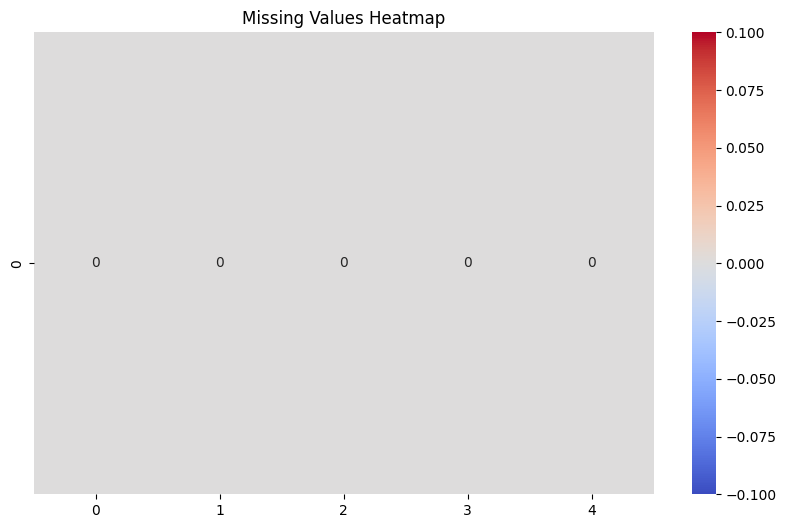

Missing Values per Column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [50]:
#Q1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")

missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.values.reshape(1, -1), annot=True, cmap='coolwarm')
plt
plt.title("Missing Values Heatmap")
plt.show()

print("Missing Values per Column:")
print(missing_values)

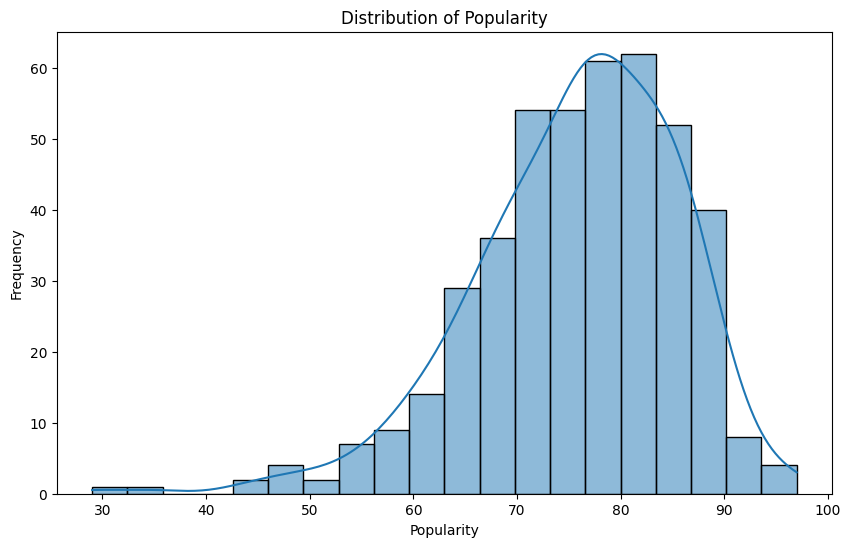

Popularity Distribution:
count    440.000000
mean      75.736364
std        9.886534
min       29.000000
25%       70.000000
50%       77.000000
75%       83.000000
max       97.000000
Name: Popularity, dtype: float64


In [51]:
#Q2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")

plt.figure(figsize=(10, 6))
sns.histplot(df["Popularity"], bins=20, kde=True)
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

print("Popularity Distribution:")
print(df["Popularity"].describe())

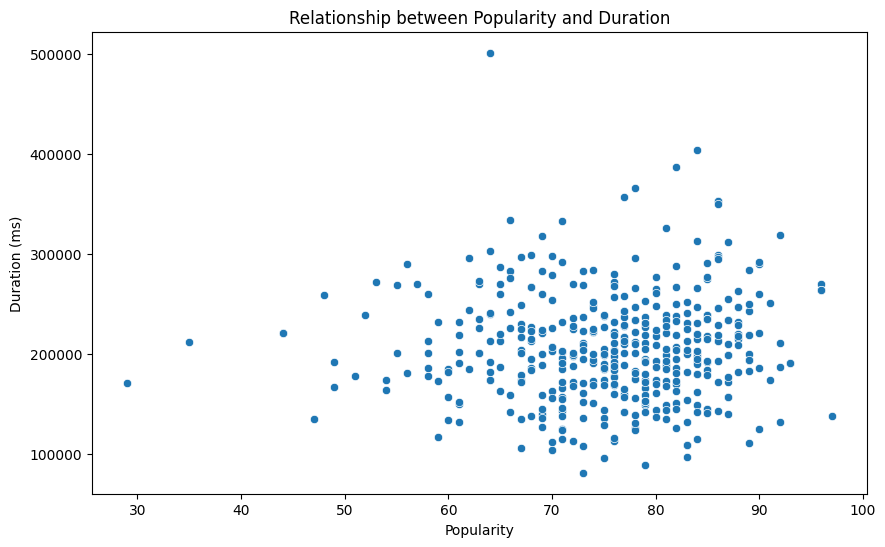

Popularity vs. Duration: 0.040744872170752594


In [52]:
#Q3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Popularity"], y=df["Duration (ms)"])
plt.title("Relationship between Popularity and Duration")
plt.xlabel("Popularity")
plt.ylabel("Duration (ms)")
plt.show()

print("Popularity vs. Duration:", df["Popularity"].corr(df["Duration (ms)"]))

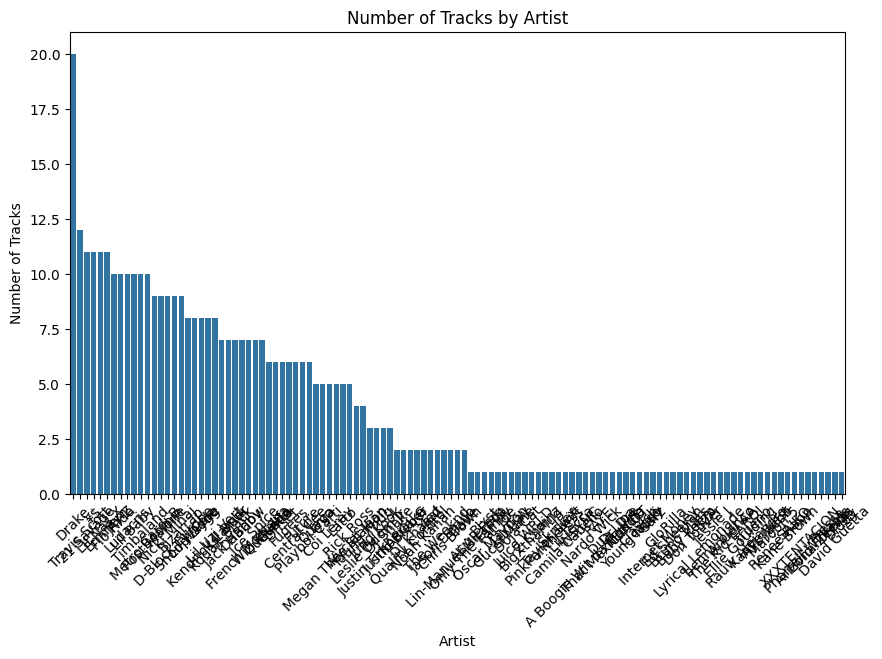

Artist with the Highest Number of Tracks:
Artist
Drake    20
Name: count, dtype: int64


In [53]:
#Q4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplo?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")

artist_track_counts = df["Artist"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_track_counts.index, y=artist_track_counts.values)
plt.title("Number of Tracks by Artist")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.show()

print("Artist with the Highest Number of Tracks:")
print(artist_track_counts.head(1))

In [54]:
#Q5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
import pandas as pd

df = pd.read_csv("spotify.csv")

least_popular_tracks = df.nsmallest(5, "Popularity")

print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[["Artist", "Track Name", "Popularity"]])

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [55]:
#Q6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?
import pandas as pd

df = pd.read_csv("spotify.csv")

top_5_artists = df["Artist"].value_counts()
top_5_artists = top_5_artists.nlargest(5).index
average_popularity_by_artist = df[df["Artist"].isin(top_5_artists)].groupby("Artist")["Popularity"].mean()
print(average_popularity_by_artist)

Artist
21 Savage       84.181818
Drake           83.500000
Lil Nas X       76.090909
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


In [56]:
#Q7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")

top_5_artists = df["Artist"].value_counts()
top_5_artists = top_5_artists.nlargest(5).index
top_tracks_by_artist = df[df["Artist"].isin(top_5_artists)].groupby("Artist")
top_tracks_by_artist = top_tracks_by_artist.apply(lambda x: x.nlargest(1, "Popularity"))
top_tracks_by_artist = top_tracks_by_artist.reset_index(drop=True)

print("Top 5 Most Popular Artists:")
print(top_tracks_by_artist)

Top 5 Most Popular Artists:
         Artist                               Track Name  Popularity  \
0     21 Savage                                   redrum          96   
1         Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92   
2     Lil Nas X                        THATS WHAT I WANT          81   
3  Travis Scott               FE!N (feat. Playboi Carti)          93   
4            ¥$                                 CARNIVAL          96   

   Duration (ms)                Track ID  
0         270697  52eIcoLUM25zbQupAZYoFh  
1         319191  1yeB8MUNeLo9Ek1UEpsyz6  
2         143901  0e8nrvls4Qqv5Rfa2UhqmO  
3         191700  42VsgItocQwOQC3XWZ8JNA  
4         264324  3w0w2T288dec0mgeZZqoNN  


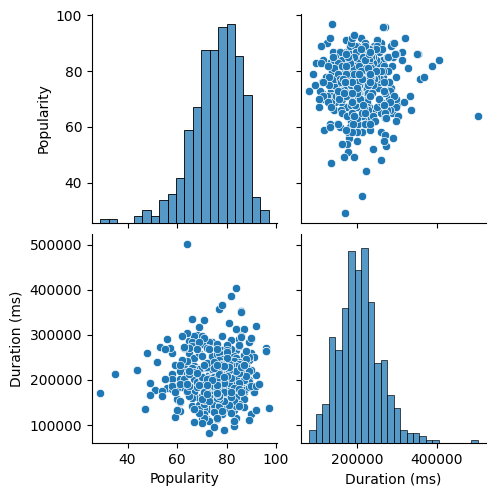

Relationship between Popularity, Duration (ms):
               Popularity  Duration (ms)
Popularity       1.000000       0.040745
Duration (ms)    0.040745       1.000000


In [57]:
#Q8.Visualize relationships between multiple numerical variables simultaneously using a pair plot?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")

sns.pairplot(df[["Popularity", "Duration (ms)"]])
plt.show()

print("Relationship between Popularity, Duration (ms):")
print(df[["Popularity", "Duration (ms)"]].corr())

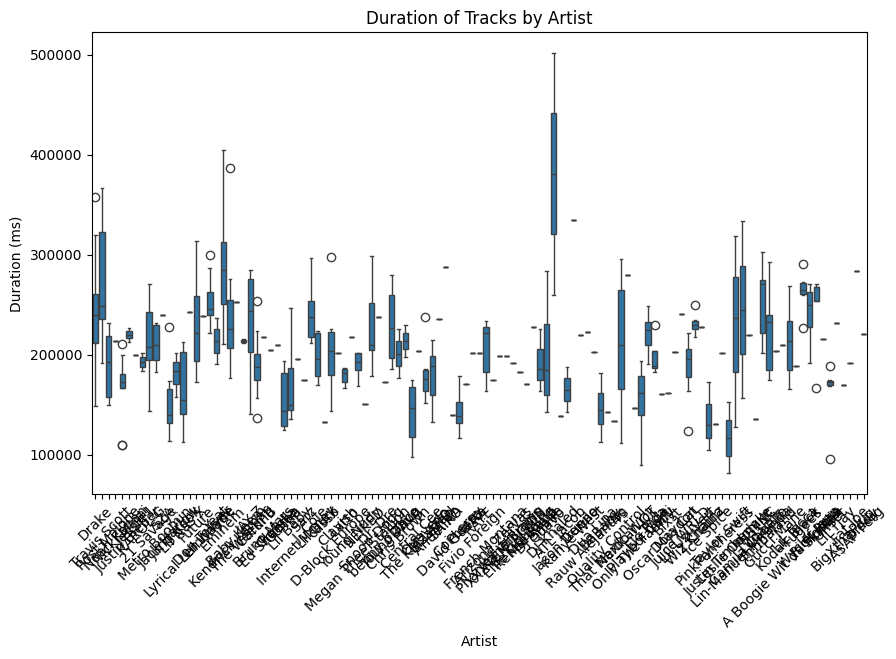

Duration of Tracks by Artist: Artist
*NSYNC                    135426.000000
2 Chainz                  227906.000000
21 Savage                 216150.454545
A Boogie Wit da Hoodie    209269.000000
A$AP Ferg                 283693.000000
                              ...      
Young Nudy                217213.000000
Young Thug                229421.750000
benny blanco              172714.000000
cassö                     132359.000000
¥$                        208035.454545
Name: Duration (ms), Length: 115, dtype: float64


In [58]:
#Q9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=df)
plt.title("Duration of Tracks by Artist")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=45)
plt.show()

print("Duration of Tracks by Artist:", df.groupby("Artist")["Duration (ms)"].mean())

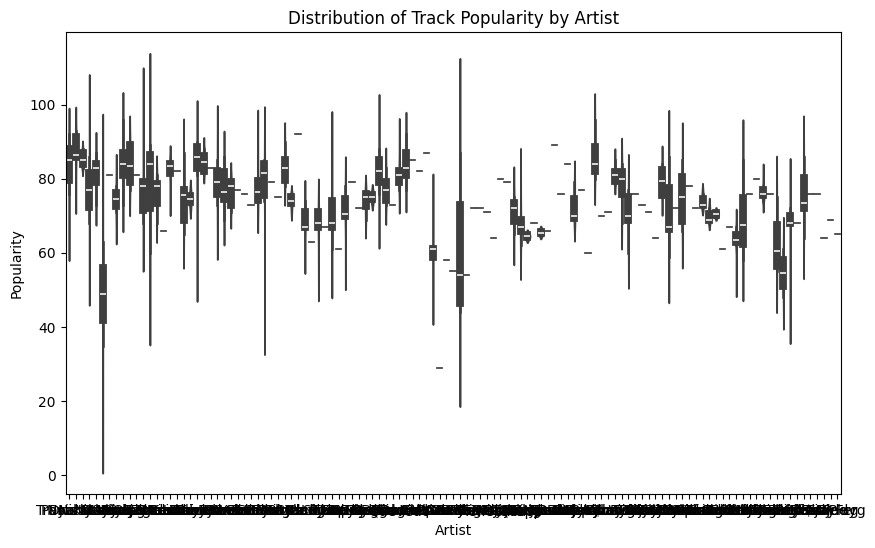

Distribution of Track Popularity by Artist:                         count       mean       std   min    25%   50%   75%  \
Artist                                                                        
*NSYNC                    1.0  67.000000       NaN  67.0  67.00  67.0  67.0   
2 Chainz                  1.0  72.000000       NaN  72.0  72.00  72.0  72.0   
21 Savage                11.0  84.181818  5.913006  73.0  81.00  84.0  87.0   
A Boogie Wit da Hoodie    1.0  80.000000       NaN  80.0  80.00  80.0  80.0   
A$AP Ferg                 1.0  69.000000       NaN  69.0  69.00  69.0  69.0   
...                       ...        ...       ...   ...    ...   ...   ...   
Young Nudy                1.0  67.000000       NaN  67.0  67.00  67.0  67.0   
Young Thug                4.0  73.750000  3.304038  69.0  72.75  75.0  76.0   
benny blanco              1.0  72.000000       NaN  72.0  72.00  72.0  72.0   
cassö                     1.0  92.000000       NaN  92.0  92.00  92.0  92.0   
¥$      

In [59]:
#Q10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")

plt.figure(figsize=(10, 6))
sns.violinplot(x="Artist", y="Popularity", data=df)
plt.title("Distribution of Track Popularity by Artist")
plt.xlabel("Artist")
plt.ylabel
plt.show()

print("Distribution of Track Popularity by Artist:", df.groupby("Artist")["Popularity"].describe())